In [408]:
#Librerías necesarias

import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
import requests
from io import BytesIO


In [409]:
#Directorio de trabajo
os.chdir('C:/Users/claud/Documents/')

In [410]:
#Obtener tuits que digan viva méxico

tweets_list1 = []

# Usar TwitterSearchScraper para obtener los tuits mencionando a la cuenta @ticketmaster_me o que contengan ticketmaster en el texto del 9 de diciembre de 2022 al 10 de diciembre de 2022
# selección menor a 10,000 tuits

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Ticketmaster since:2022-12-09 until:2022-12-10').get_items()):
    if i>=10000:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [411]:
#Crear dataframe
tweets_df1 = pd.DataFrame(tweets_list1, columns=['datetime', 'tweet_id', 'text', 'username'])

In [412]:
#ordenar por fecha
tweets_df1.sort_values(by=['datetime'], inplace=True)

In [413]:
#Dejar solo hora y minutos de variable datetime
tweets_df1['hour'] = tweets_df1['datetime'].dt.strftime('%H:%M')

In [414]:
#Anchod de columna
pd.set_option('display.max_colwidth', None)

tweets_df1


,datetime,tweet_id,text,username,hour
5098,2022-12-09 00:00:00+00:00,1601003693117100032,#Actualidad | ¡Mucho ojo! Bad Bunny se presentará en la #CDMX el fin de semana y aquí te traemos una serie consejos para identificar boletos falsos de Ticketmaster. 🔎💵\n\n#MundoEjecutivo #BadBunny #Ticketmaster \n\nhttps://t.co/gPKnXJRFPH,MundoEjecutivo,00:00
5097,2022-12-09 00:00:02+00:00,1601003700717174785,"✨ Última oportunidad para comprar tu boletos al 2x1 y ver a @Ricardo_Peralta en #MentiDrags. \n\nCompra tus boletos aquí: https://t.co/i32vHhE1W3 para el 22 de diciembre, 8:00 pm 🤍🖤 \n\n@Ticketmaster_Me, @BOBOProduccion, @late_produccion, @GOUPRODUCCIONES. https://t.co/DnUP59hn5W",Oficialmentiras,00:00
5095,2022-12-09 00:00:20+00:00,1601003779817500675,Has anybody used Klarna for ticket master?,lizxavii,00:00
5096,2022-12-09 00:00:20+00:00,1601003777687011329,Taylor Swift fans sue Ticketmaster claiming company violated antitrust laws https://t.co/jNpv4BpmFO,redeyechicago,00:00
5094,2022-12-09 00:00:24+00:00,1601003792962449410,Ticketmaster me va a dejar comprar boletos \n\nTicketmaster me va a dejar comprar boletos \n\nTicketmaster me va a dejar comprar boletos 🤞🏼🤞🏼🤞🏼🤞🏼,fer__mendo,00:00
...,...,...,...,...,...
4,2022-12-09 23:59:37+00:00,1601365987269705728,@tourbadbunny @Ticketmaster_Me Siempre es así 🤷🏻‍♀️,meennxx_,23:59
3,2022-12-09 23:59:43+00:00,1601366010006642688,Chinga a tu madre Ticketmaster :(,arrobamauconde,23:59
2,2022-12-09 23:59:49+00:00,1601366034115461120,SIII RATEROS @Ticketmaster_Me https://t.co/DBpO8F6kI1,joehoenthusiast,23:59
1,2022-12-09 23:59:58+00:00,1601366071654522881,@Ticketmaster_Me @Tenor_Fernando @SusanaZabaleta @Profeco,verymuchoamor,23:59


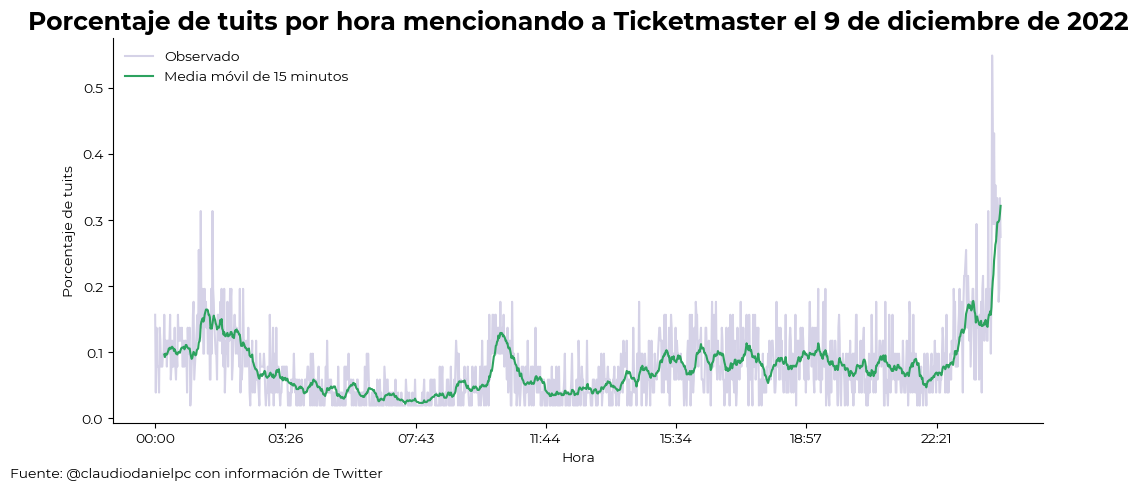

In [415]:
#Hacer gráfica de porcentaje de tuits por hora

#Fuente de la gráfica

plt.rcParams['font.family'] = "Montserrat"
tweets_df1['hour'].value_counts(normalize=True).mul(100).sort_index().plot(kind='line', figsize=(15,5), 
 color='#756bb1', alpha=0.3)

#Media móvil de 3 horas
tweets_df1['hour'].value_counts(normalize=True).mul(100).sort_index().rolling(15).mean().plot(kind='line', figsize=(12,5),
    color='#2ca25f')

#Títulos
plt.title('Porcentaje de tuits por hora mencionando a Ticketmaster el 9 de diciembre de 2022', fontsize=18, fontweight='bold')
plt.xlabel('Hora')
plt.ylabel('Porcentaje de tuits')
#Eliminar marco de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#lEYENDA sin borde
plt.legend(['Observado', 'Media móvil de 15 minutos'], loc='upper left', frameon=False)



#img=Image.open(requests.get('https://blog.ticketmaster.com.mx/wp-content/uploads/2020/06/B2B_SitePreview.jpg', stream=True).raw)
#Añadir imagen como fondo de toda la gráfica

#plt.figimage(img, alpha=0.2,xo=100, yo=3)

#Fuente de los datos
plt.figtext(0.35, 0, 'Fuente: @claudiodanielpc con información de Twitter', horizontalalignment='right')

#Guardar gráfica
plt.savefig('porcentaje_tuits_ticketmaster.png', dpi=300, bbox_inches='tight')
